In [3]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
if os.name == 'nt' : # windows OS
    font_family = "Malgun Gothic"
else : #Mac OS
    font_family = "AppleGothic"
    
# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

In [4]:
# 베르누이 분포 정의
mu = 0.7
bern = stats.bernoulli(mu)

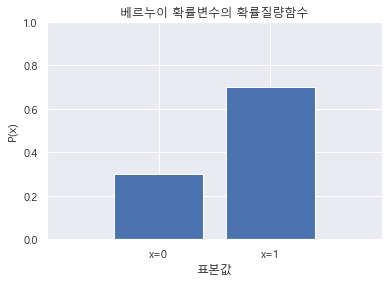

In [6]:
## 확률질량함수 계산 및 시각화
b_x = [0,1]
bern_pmf = bern.pmf(b_x)

# 시각화
plt.bar(b_x, bern_pmf)
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0,1], ['x=0', 'x=1'])
plt.xlabel('표본값')
plt.ylabel('P(x)')
plt.title('베르누이 확률변수의 확률질량함수')
plt.show()

In [7]:
# 베르누이 검정을 위한 베르누이 샘플 100개 생성
x_sample_bern = bern.rvs(100, random_state = 0)

x_sample_bern

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [38]:
# 베르누이 시뮬레이션
y_bern = np.bincount(x_sample_bern, minlength=2) / float(len(x_sample_bern))

df_bern = pd.DataFrame({'결과' : bern_pmf, "검증(시뮬레이션)" : y_bern})
df_bern.index = [0,1]
df_bern

,결과,검증(시뮬레이션)
0,0.3,0.23
1,0.7,0.77


In [9]:
## scipy 이항분포 확률ㅈㄹ량 함수 계산

# 0.3의 확률을 갖는 15회의 실험에서 3회 성공할 확률 반환
print('k=3, n=15, p=0.3 의 PMF : ' , stats.binom.pmf(3,n=15,p=0.3))

# 0.3의 확률을 갖는 15회의 실험에서 0~4회 성공할 확률의 누적값 반환
print('k=0~4, n=15, p=0.3의 PMF : ', stats.binom.cdf(4, n=15, p=0.3))

k=3, n=15, p=0.3 의 PMF :  0.17004021326428484
k=0~4, n=15, p=0.3의 PMF :  0.5154910592268434


In [10]:
# p의 확률분포를 갖는 n회의 시행에서 k회 성공할 확률을 반환하는 함수 생성
def bion_dist(k, n, p):
    pmf_bion = stats.binom.pmf(k, n =n, p = p)
    return pmf_bion

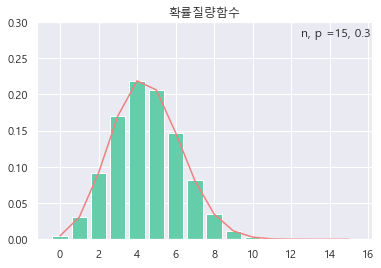

In [13]:
# 0~15 범위 생성 : 성공 횟수
x = np.arange(0,16)

# 확률질량함수의 값 array
pdf_result = [bion_dist(k, 15, 0.3) for k in range(0,16)]

# 시각화
plt.title("확률질량함수")
plt.ylim(0, 0.3)
plt.text(12.5, 0.28, 'n, p =15, 0.3')
plt.bar(x, pdf_result, color='mediumaquamarine')
plt.plot(x, pdf_result, color = 'lightcoral')
plt.show()

In [14]:
# scipy 포아송 함수
# 3번의 시행에서 평균 사건 수 (기대값 2)에 대한 발생 확률
stats.poisson.pmf(3, 2, loc = 0)

0.18044704431548356

In [15]:
# n번의 시행에서 평균 사건 수(기대값, 람다)에 대한 발생 확률 함수
def pois_dist(n,lamb) :
    pmf_poi = stats.poisson.pmf(n, lamb, loc =0)
    return pmf_poi

In [31]:
# 확률질량함수의 값 array
x = np.arange(0,41)
poi_pdf_result = [pois_dist(n,10) for n in range(0,41)]

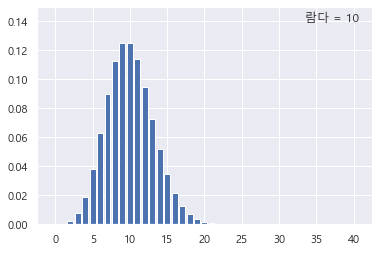

In [32]:
plt.ylim(0,0.15)
plt.text(33.5, 0.14, '람다 = 10')
plt.bar(x, poi_pdf_result)
plt.show()

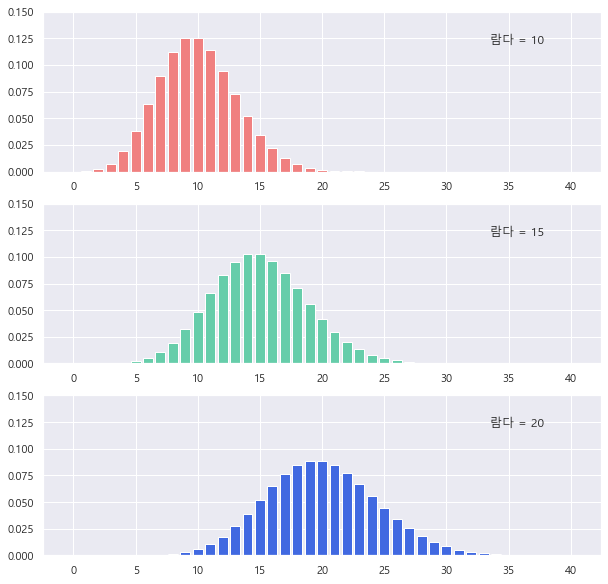

In [36]:
## 기대값에 따른 포아송분포 차이 확인
x = np.arange(0,41)

fig = plt.figure(figsize = (10,10))

fig.add_subplot(3,1,1)
pmf_poin1 = np.array([pois_dist(n,10) for n in range(0,41)])
plt.ylim(0, 0.15)
plt.text(33.5 ,0.12, '람다 = 10')
plt.bar(x, pmf_poin1, color = 'lightcoral')

fig.add_subplot(3,1,2)
pmf_poin1 = np.array([pois_dist(n,15) for n in range(0,41)])
plt.ylim(0, 0.15)
plt.text(33.5 ,0.12, '람다 = 15')
plt.bar(x, pmf_poin1, color = 'mediumaquamarine')

fig.add_subplot(3,1,3)
pmf_poin1 = np.array([pois_dist(n,20) for n in range(0,41)])
plt.ylim(0, 0.15)
plt.text(33.5 ,0.12, '람다 = 20')
plt.bar(x, pmf_poin1, color = 'royalblue')

plt.show()